In [1]:
# import libraries
import numpy as  np
import pandas as pd
import  array
import matplotlib.pyplot as plt
import pandas.api.types as  ptypes
import seaborn as sb
import sklearn
from sklearn import preprocessing
import pickle
import warnings
import csv
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\mvsan\Downloads\bike_sharing.csv")

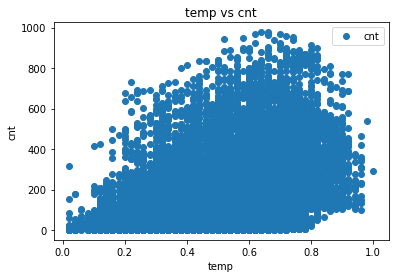

In [3]:
# ploting temp vs cnt
data.plot(x='temp', y='cnt', style='o')  
plt.title('temp vs cnt')  
plt.xlabel('temp')  
plt.ylabel('cnt')  
plt.show()

<AxesSubplot:>

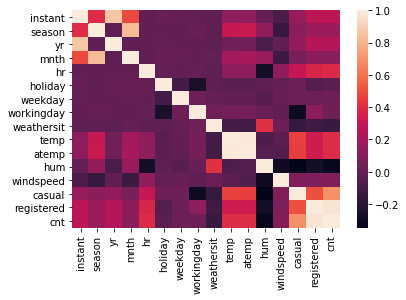

In [5]:
# correlation between columns
corr = data.corr()
sb.heatmap(corr)

In [6]:
# droping column that has negetive or no relationship together
data = data.drop(columns=['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 
                                'weekday','workingday', 'weathersit','atemp', 'hum', 'windspeed', 
                                'casual','registered'], axis=1)
data.head()

,temp,cnt
0,0.24,16
1,0.22,40
2,0.22,32
3,0.24,13
4,0.24,1


In [7]:
data.describe()

,temp,cnt
count,17379.000000,17379.000000
mean,0.496987,189.463088
std,0.192556,181.387599
min,0.020000,1.000000
25%,0.340000,40.000000
50%,0.500000,142.000000
75%,0.660000,281.000000
max,1.000000,977.000000


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(data,test_size = 0.20,  random_state=0)

In [10]:
# split train data into training data and testing data
from sklearn.model_selection import train_test_split
x_train_data,cross_valid = train_test_split(x_train,test_size = 0.20,random_state=0)

In [11]:
x_train_data.shape

(11122, 2)

In [12]:
# split x_train_data into x and y  
x = x_train_data.iloc[:,:-1].values
y = x_train_data.iloc[:,1].values

In [13]:
y=y.reshape(-1,1)
y.shape

(11122, 1)

In [14]:
from sklearn.linear_model import LinearRegression
class Training_Model:
#     fitting multi linear regression to training set
    regressor = LinearRegression()
    def Fit_Model(self,x,y):
        regressor = LinearRegression()
        regressor.fit(x,y)
        regressor.score(x,y)
        return regressor
    
#     predicting the  train set result
    def prediction_train(self,x_test):
        y_predict_train = regressor.predict(x_test)
        return y_predict_train
    
#     predicting the cross  validation result
    def prediction_cv(self,x_cv):
        y_predict_cv = regressor.predict(x_cv)
        return y_predict_cv

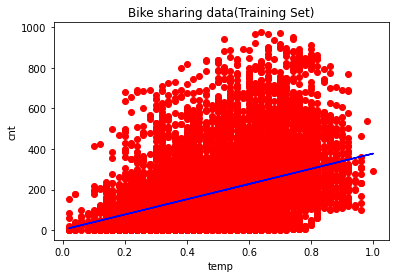

In [16]:
# visualizing the training set result
plt.scatter(x,y,color='red')
plt.plot(x,regressor.predict(x),color='blue')
plt.title('Bike sharing data(Training Set)')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.show()

In [19]:
train_accuracy = sklearn.metrics.r2_score(y,y_predict_train)
train_accuracy = (1-train_accuracy)*100
print("Accuracy of train data =",train_accuracy)

Accuracy of train data = 83.97774710407977
